# Tarea - Caminata aleatoria y simulación de apuestas

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

In [1]:
# Primero importamos las librerías necesarias
import numpy as np # Para los valores numéricos
import matplotlib.pyplot as plt # Para graficar
from mpl_toolkits.mplot3d import Axes3D # Para la gráfica 3D

In [2]:
# Definimos los parámetros
pasos = 10000
dt = 0.001
N_caminatas = 3

In [3]:
# Definimos la función de la caminata aleatoria de la partícula
def caminata_browniana(pasos, dt):
    # Inicializamos las trayectorias con 0 con un arreglo que contenga la posición inicial y la trayectoria entera
    x = np.zeros(pasos + 1)
    y = np.zeros(pasos + 1)
    z = np.zeros(pasos + 1)
    sqrt_dt = np.sqrt(dt) # Definimos la raiz de Delta_t

    for i in range(pasos):
        # Usamos np.random.choice para X_i = {1, -1}
        xi_x = np.random.choice([1, -1])
        xi_y = np.random.choice([1, -1])
        xi_z = np.random.choice([1, -1])
        # Aplicamos la fórmula: W_i = W_{i-1} + X_i * sqrt(dt)
        x[i+1] = x[i] + xi_x * sqrt_dt
        y[i+1] = y[i] + xi_y * sqrt_dt
        z[i+1] = z[i] + xi_z * sqrt_dt

    return x, y, z

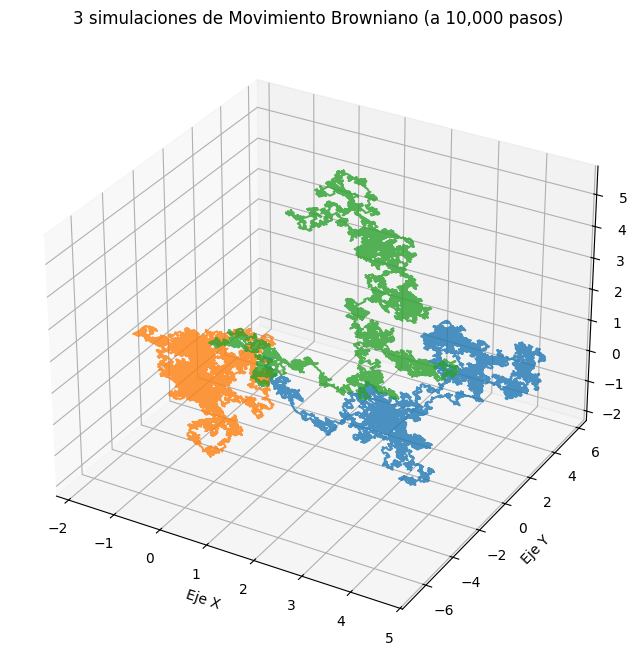

In [4]:
# Graficamos
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Simulamos y graficamos las N_caminatas
for _ in range(N_caminatas):
    x, y, z = caminata_browniana(pasos, dt)
    ax.plot(x, y, z, alpha=0.8)

ax.set_title(f'{N_caminatas} simulaciones de Movimiento Browniano (a 10,000 pasos)')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.grid(True)
plt.show()

Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [5]:
# Modificamos la función para guardar solo la ultima posición.
def caminata_browniana_final(pasos, dt):
    x, y, z = 0.0, 0.0, 0.0 # Comenzamos en ceros
    sqrt_dt = np.sqrt(dt)

    for i in range(pasos):
        x += np.random.choice([1, -1]) * sqrt_dt
        y += np.random.choice([1, -1]) * sqrt_dt
        z += np.random.choice([1, -1]) * sqrt_dt

    return [x, y, z]

# Probamos la función
posicion_final = caminata_browniana_final(pasos, dt)
print(f"Posición final de una caminata de prueba: {posicion_final}")

Posición final de una caminata de prueba: [np.float64(5.551115123125783e-17), np.float64(4.300697617829005), np.float64(1.5811388300841909)]


Simule 1000 caminatas con este nuevo modelo de movimiento browniano y diga la probabilidad de que las partículas satisfagan $x>1$, $y>2$ y $z>0$.

In [6]:
# Usamos el método Montecarlo para obtener las probabilidades

N = 1000  # Número de caminatas
posiciones_finales = [] # Almacenamos los resultados finales

for _ in range(N):
    posiciones_finales.append(caminata_browniana_final(pasos, dt))

posiciones_finales = np.array(posiciones_finales) # Convertimos la lista a un array de NumPy

# Calculamos la variable de Bernoulli
B = (posiciones_finales[:, 0] > 1) & \
            (posiciones_finales[:, 1] > 2) & \
            (posiciones_finales[:, 2] > 0)
# Nota: aprendí que se puede colocar \ para la continuidad de una línea de código
probabilidad = np.mean(B)

print(f"Simulaciones de Montecarlo realizadas: {N}")
print(f"Número de partículas que cumplen (x>1, y>2, z>0): {np.sum(B)}")
print(f"Probabilidad estimada: {probabilidad*100:.2f}%")
# Nota: Aprendí que en :.2f, : le indica a python una separación de variable e instrucciones, .2 le dice redondear a 2 decimales y f le indica formato de punto flotante

Simulaciones de Montecarlo realizadas: 1000
Número de partículas que cumplen (x>1, y>2, z>0): 56
Probabilidad estimada: 5.60%


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

In [8]:
# Definimos la función que almacena la trayectoria para graficar
def simulacion_apostador_quiebra():
    C = 20  # Capital inicial
    capitales = [C] # Lista para guardar la historia del capital
    while C > 0: # Usamos un 'while' ya que el juego termina en la quiebra (C <= 0)
        # Definir la apuesta A_i según las reglas de la tarea
        if C >= 6:
            A = C / 2
        else:
            A = 2
        V = np.random.choice([1, -1]) # Simular el volado V_i (+1 o -1)
        C_nuevo = C + V * A # Calcular el nuevo capital

        # Actualizar o terminar
        if C_nuevo <= 0:
            capitales.append(0)
            C = 0 # Asignamos 0 para terminar el bucle
        else:
            C = C_nuevo
            capitales.append(C)

    return capitales

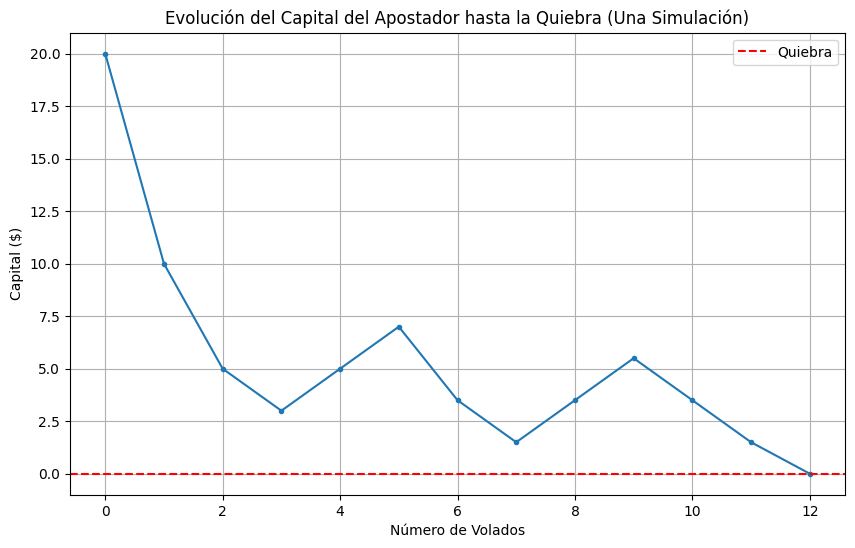

In [9]:
# Graficamos
historia_capital = simulacion_apostador_quiebra()

plt.figure(figsize=(10, 6))
plt.plot(historia_capital, '.-')
plt.title('Evolución del Capital del Apostador hasta la Quiebra (Una Simulación)')
plt.xlabel('Número de Volados')
plt.ylabel('Capital ($)')
plt.axhline(y=0, color='r', linestyle='--', label='Quiebra')
plt.legend()
plt.grid(True)
plt.show()

2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [10]:
# Para Montecarlo, usamos una función optimizada que solo devuelve el conteo
def volados_para_quiebra():
    C = 20
    volados = 0
    while C > 0:
        if C >= 6:
            A = C / 2
        else:
            A = 2
        V = np.random.choice([1, -1])
        C += V * A  # Actualizamos C directamente
        volados += 1 # Contamos el volado
    return volados

# Definimos algunos parámetros
N = 10000  # 10,000 apostadores
resultados_volados = []

# Simulamos 10,000 veces
for _ in range(N):
    resultados_volados.append(volados_para_quiebra())

promedio_volados = np.mean(resultados_volados) # Calculamos el promedio

print(f"Simulaciones de Montecarlo realizadas: {N}")
print(f"Número de volados promedio para quedar en quiebra: {promedio_volados:.2f}")

Simulaciones de Montecarlo realizadas: 10000
Número de volados promedio para quedar en quiebra: 26.71


3. Muestre un histograma del número de volados.

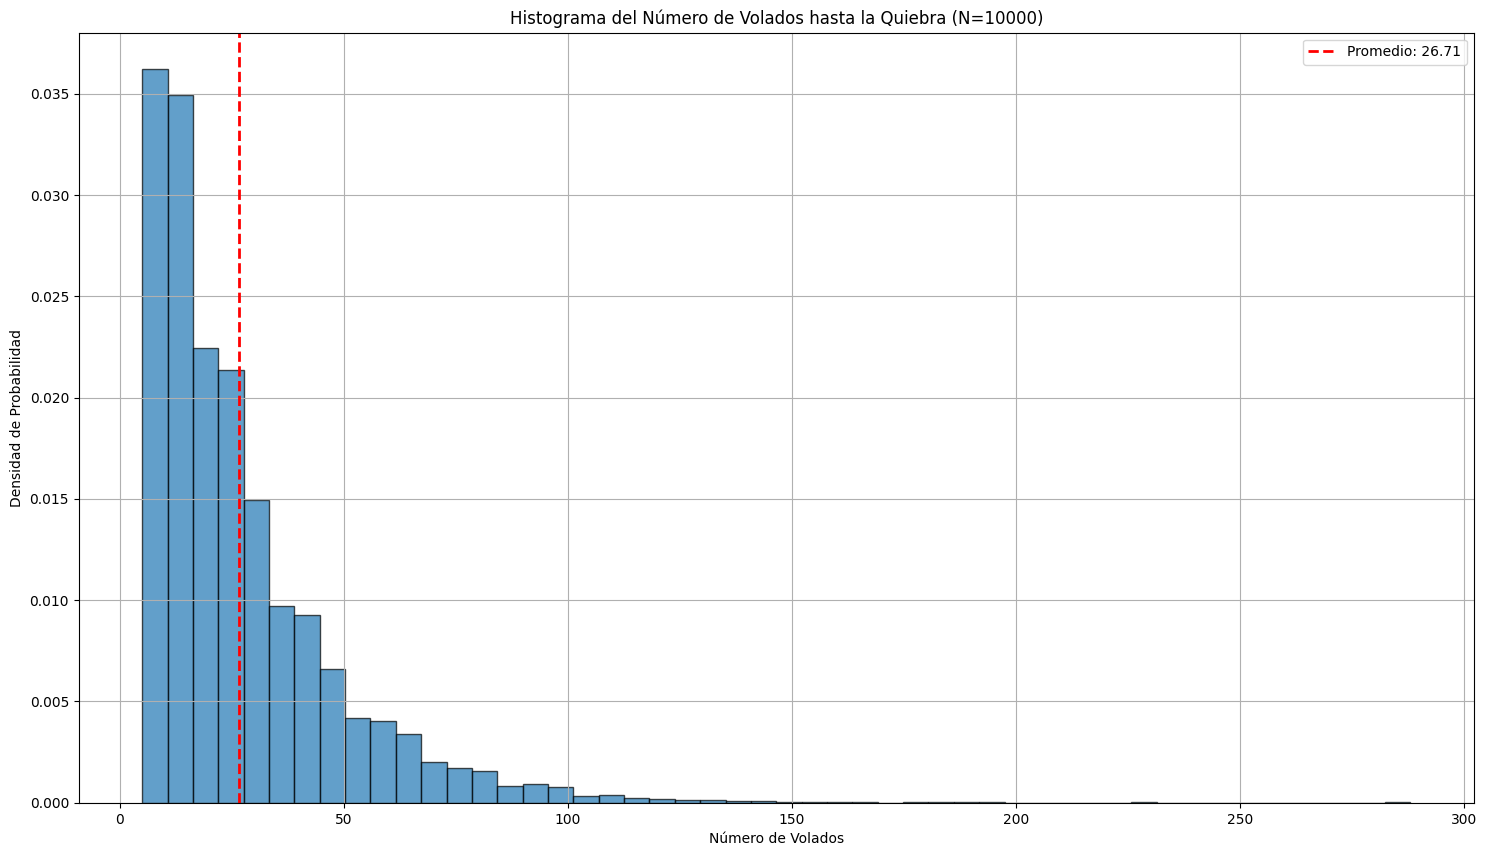

In [11]:
# Graficamos el histograma de los resultados

plt.figure(figsize=(18, 10))
# Usamos los 'resultados_volados' y 'promedio_volados' definidos en la celda anterior
plt.hist(resultados_volados, bins=50, edgecolor='black', alpha=0.7, density=True)

plt.title(f'Histograma del Número de Volados hasta la Quiebra (N={N})')
plt.xlabel('Número de Volados')
plt.ylabel('Densidad de Probabilidad')
plt.axvline(promedio_volados, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {promedio_volados:.2f}')
plt.legend()
plt.grid(True)
plt.show()